<a href="https://colab.research.google.com/github/Issey2023/Coding-dojo-Project-2-/blob/main/Project_2_Part_4_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Student: Ismaa-eel Hendricks

In [76]:
#load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing necessary tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_sampler_pipeline
from imblearn.pipeline import Pipeline as imbpipeline

#Importing the Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_sampler_pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings("ignore")


## Functions



In [2]:
# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{previous exercises and code alongs}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{previous exercises and code alongs}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

In [3]:
#mount drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Selection

I have selected the data for:

[Stroke Prediction Data Set](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

[Car Insurance](https://www.kaggle.com/datasets/sagnik1511/car-insurance-data)












#First Choice

In [4]:
#create file path
fpath = '/content/drive/MyDrive/coding dojo week 6/coding dojo projec2 /healthcare-dataset-stroke-data.csv'
dhc = pd.read_csv(fpath)
dhc.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
#how many cases are included in the dataset
length = len(dhc)
#how many features are in the dataset
features = dhc.shape[1]-1

print ("There are "+ str(len(dhc))+" cases in this dataset")
print ("There are {}".format(features)+" features in this dataset")

There are 5110 cases in this dataset
There are 11 features in this dataset


##First choice: [Stroke Prediction Data Set](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

1. **Source of data**\
[www.kaggle.com](https://www.kaggle.com/)
2. **Brief description of data**\
Context:\
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status.

3. **What is the target?**\
Determine if the patient will have stroke or not. If yes, then 1, else 0. The target is the variable that a patientw will have a stroke or not.

4. **What does one row represent?** (A person? A business? An event? A product?)\
Each row in the data provides relavant information about the patient.
5. **Is this a classification or regression problem?**\
This is a classification problem.

6. **How many features does the data have?**\
There are 11 features in this dataset

7. **How many rows are in the dataset?**\
There are 5110 cases in this dataset.

8. **What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset**?\
One challenge could be dealing with data imbalance, which might necessitate the identification and application of appropriate techniques and hyperparameters to effectively model the imbalanced dataset. Additionally, determining the optimal approaches for data standardization, handling missing values through imputation, and selecting appropriate modeling strategies will be crucial for achieving the highest level of prediction accuracy.

#Second choice

In [6]:
#create file path
fpath = '/content/drive/MyDrive/coding dojo week 6/coding dojo projec2 /Car_Insurance_Claim.csv'
df = pd.read_csv(fpath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  int64  
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  int64  
 11  CHILDREN             10000 non-null  int64  
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [7]:
dhc['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [8]:
#Description of the dataset

#how many cases are included in the dataset
length = len(df)
#how many features are in the dataset
features = df.shape[1]-1

print ("There are "+ str(len(df))+" cases in this dataset")
print ("There are {}".format(features)+" features in this dataset")


There are 10000 cases in this dataset
There are 18 features in this dataset


In [9]:
df['OUTCOME'].value_counts()

0    6867
1    3133
Name: OUTCOME, dtype: int64

##Project 2 - Part 2 (Core)

#Using the approved dataset you proposed for Project 2 - Part 1 last week, you will clean and explore the data set.

To meet the requirements for this week you must have:

- Deleted unnecessary columns.
- Deleted duplicate rows.
- Identified and addressed missing values.
- Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
- Produced univariate visuals for the target and all features.
- Identified outliers.
- Clearly commented all of your cleaning steps and described any decisions you made.
- Commit your file to your Github repository and submit the link below.

##First Choice Part 2

##Data Cleaning

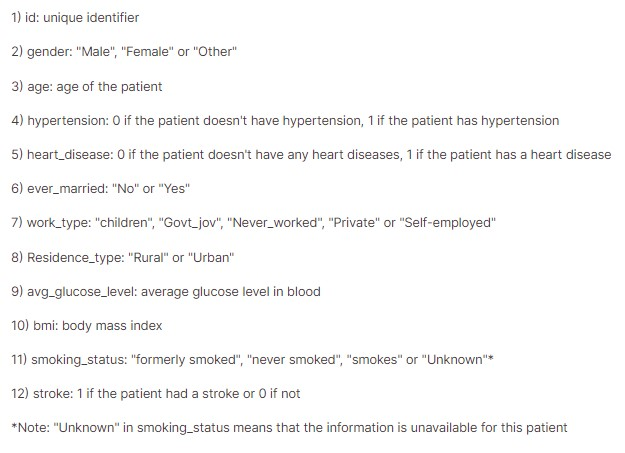

In [10]:
dhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [11]:
#Check for missing values
dhc.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
#Make a copy so we dont break the original data set and avoid any manipulations
df = dhc.copy()

In [13]:
#Delete unnecessary columns
df = df.drop(columns = ['id', 'Residence_type'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked,1


##Exploare the data

In [14]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked,1


In [15]:
#Check the data balance
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

The data set is imbalanced with a large number of cases with no stroke and a small number of cases with stroke

In [16]:
#check for missing values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [17]:
#check for duplicate values
df.duplicated().sum()

0

In [18]:
#Impute missing values in bmi column with median
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [19]:
#Confirm that there are no more missing values
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [20]:
#Identify inconsistencies in data for categorical values (i.e. Cat, cat, cats).
#Display value counts for categorical columns
for col in df.select_dtypes(include='object').columns:
  display(df[col].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Yes    3353
No     1757
Name: ever_married, dtype: int64

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [21]:
#Drop other from Gender
df.drop(df[df['gender'] == "Other"].index, inplace=True)

#If your applying the Analysis to adults only based on discussion with Client, you can drop ages < 18
#Remove age values less than 9 as per industry standard of testing from 9years old and up
df.drop(df[df['age'] < 9].index, inplace=True)

We see gender has an additional cat for other, however the count is one and will be dropped

---



##Produced univariate visuals for the target and all features.

##TARGET VARIABLE

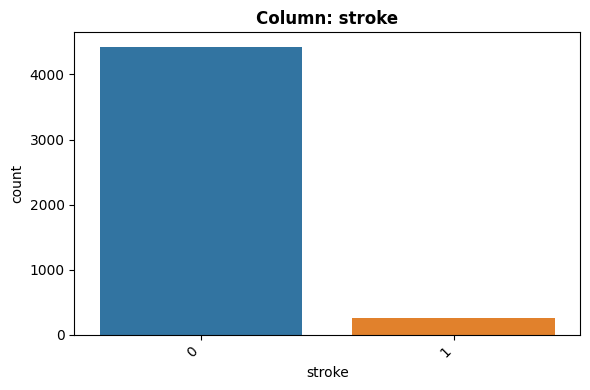

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 4427 times (94.7%)
- Not constant or quasi-constant.


In [22]:
#Plot Univariate visual for gender column
explore_categorical(df, 'stroke', fillna=False);

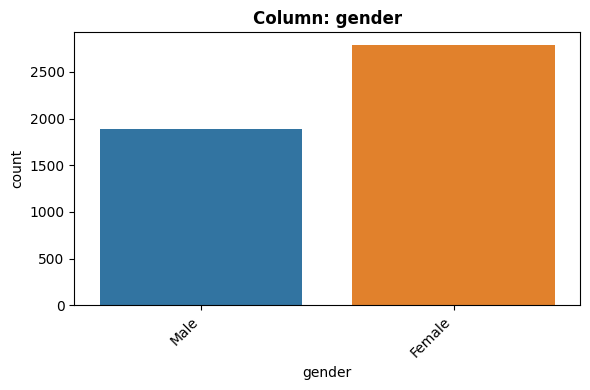

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Female' occurs 2785 times (59.57%)
- Not constant or quasi-constant.


In [23]:
#Plot Univariate visual for gender column
explore_categorical(df, 'gender', fillna=False);

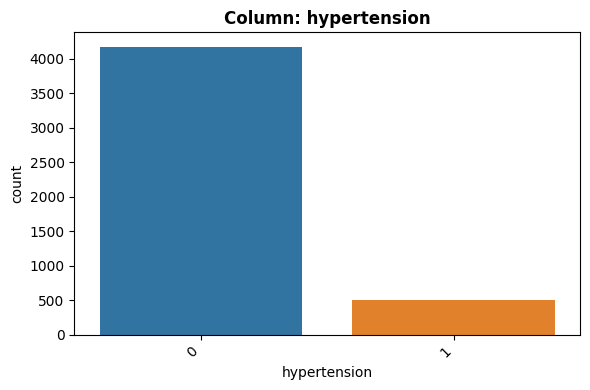

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 4177 times (89.35%)
- Not constant or quasi-constant.


In [24]:
#Plot Univariate visuals for hypertension column
explore_categorical(df, 'hypertension', fillna=False);

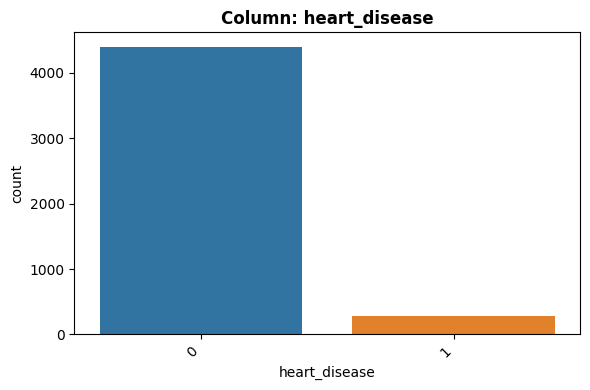

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 4400 times (94.12%)
- Not constant or quasi-constant.


In [25]:
#Plot Univariate visuals for heart_disease column
explore_categorical(df, 'heart_disease', fillna=False);

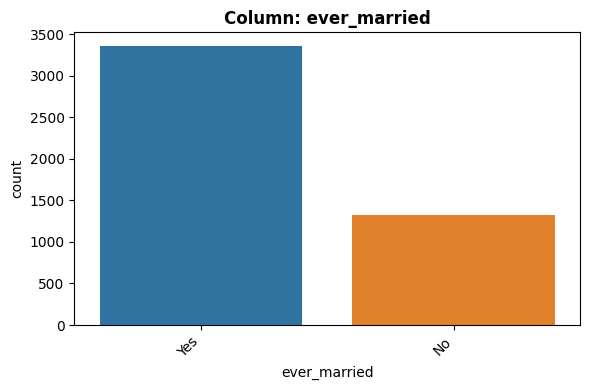

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Yes' occurs 3353 times (71.72%)
- Not constant or quasi-constant.


In [26]:
#Plot Univariate visuals for ever_married column
explore_categorical(df, 'ever_married', fillna=False);

In [27]:
#Drop other from Children from work_type
df.drop(df[df['work_type'] == "children"].index, inplace=True)

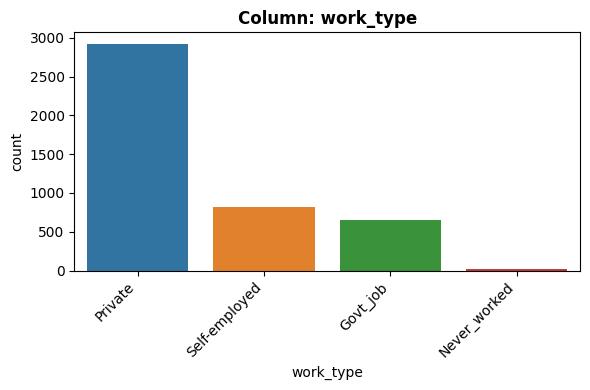

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Private' occurs 2923 times (66.13%)
- Not constant or quasi-constant.


In [28]:
#Plot Univariate visuals for ever_married column
explore_categorical(df, 'work_type', fillna=False);

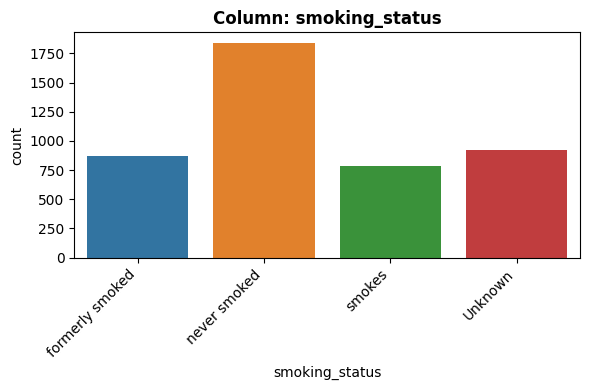

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'never smoked' occurs 1838 times (41.58%)
- Not constant or quasi-constant.


In [29]:
#Plot Univariate visuals for smoking_status column
explore_categorical(df, 'smoking_status', fillna=False);

In [30]:
from os import replace
#WE will assume those who indicated unknown as smokers.
#replace unkown with smokes
df['smoking_status'].replace('Unknown', 'smokes', inplace=True)

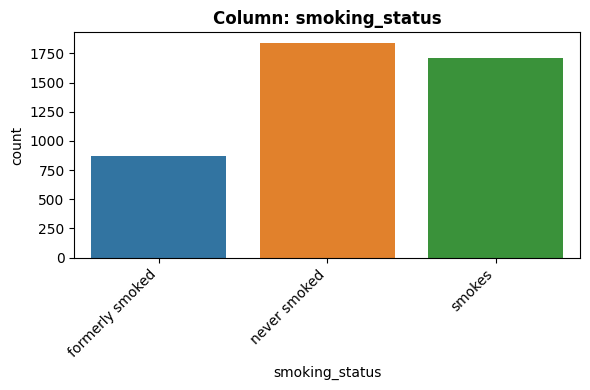

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'never smoked' occurs 1838 times (41.58%)
- Not constant or quasi-constant.


In [31]:
#Plot Univariate visuals for smoking_status column
explore_categorical(df, 'smoking_status', fillna=False);

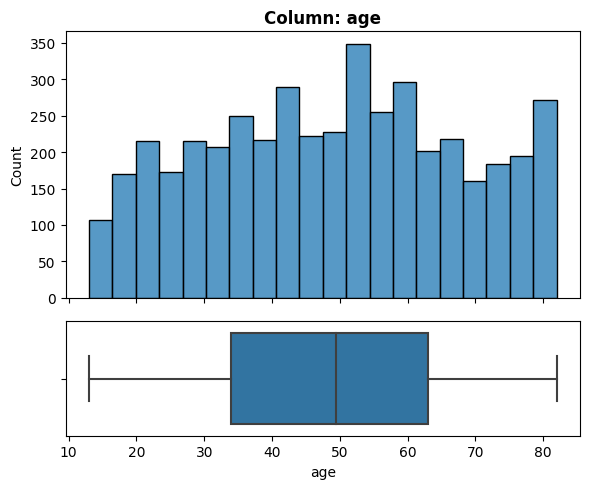

- NaN's Found: 0 (0.0%)
- Unique Values: 70
- Most common value: '78.0' occurs 102 times (2.31%)
- Not constant or quasi-constant.


In [32]:
#Plot Univariate visuals for age column
explore_numeric(df, 'age');

In [33]:
df['age'].describe()

count    4420.000000
mean       48.902036
std        18.689617
min        13.000000
25%        34.000000
50%        49.500000
75%        63.000000
max        82.000000
Name: age, dtype: float64

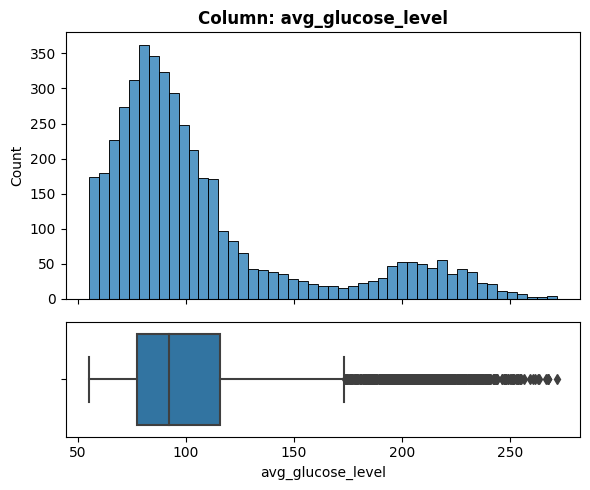

- NaN's Found: 0 (0.0%)
- Unique Values: 3588
- Most common value: '91.68' occurs 5 times (0.11%)
- Not constant or quasi-constant.


In [34]:
#Plot Univariate visuals for avg_glucose_level column
explore_numeric(df, 'avg_glucose_level');

In [35]:
df['avg_glucose_level'].describe()

count    4420.000000
mean      107.973611
std        47.275295
min        55.120000
25%        77.447500
50%        92.145000
75%       115.872500
max       271.740000
Name: avg_glucose_level, dtype: float64

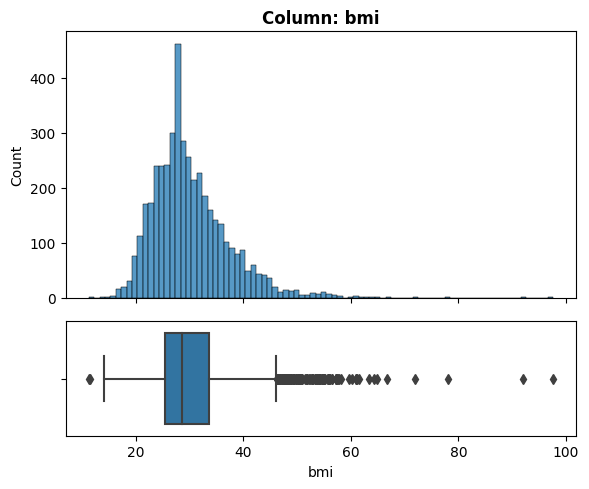

- NaN's Found: 0 (0.0%)
- Unique Values: 383
- Most common value: '28.1' occurs 214 times (4.84%)
- Not constant or quasi-constant.


In [36]:
#Plot Univariate visuals for bmi column
explore_numeric(df, 'bmi');

In [37]:
df['bmi'].describe()

count    4420.000000
mean       30.210633
std         7.190899
min        11.300000
25%        25.400000
50%        28.700000
75%        33.700000
max        97.600000
Name: bmi, dtype: float64

In [38]:
df.describe().round(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4420.00,4420.00,4420.00,4420.00,4420.00,4420.00
mean,48.90,0.11,0.06,107.97,30.21,0.06
std,18.69,0.32,0.24,47.28,7.19,0.23
min,13.00,0.00,0.00,55.12,11.30,0.00
25%,34.00,0.00,0.00,77.45,25.40,0.00
50%,49.50,0.00,0.00,92.15,28.70,0.00
75%,63.00,0.00,0.00,115.87,33.70,0.00
max,82.00,1.00,1.00,271.74,97.60,1.00


In [39]:
#If your applying the Analysis to adults only based on discussion with Client, you can drop ages < 18
#Remove age values less than 9 as per industry standard of testing from 9years old and up
df.drop(df[df['age'] < 9].index, inplace=True)

##Identify any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.

In [40]:
corr = df.corr()
corr.round(2)


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.00,0.25,0.27,0.23,0.06,0.25
hypertension,0.25,1.00,0.10,0.17,0.12,0.12
heart_disease,0.27,0.10,1.00,0.16,-0.01,0.13
avg_glucose_level,0.23,0.17,0.16,1.00,0.14,0.13
bmi,0.06,0.12,-0.01,0.14,1.00,-0.00
stroke,0.25,0.12,0.13,0.13,-0.00,1.00


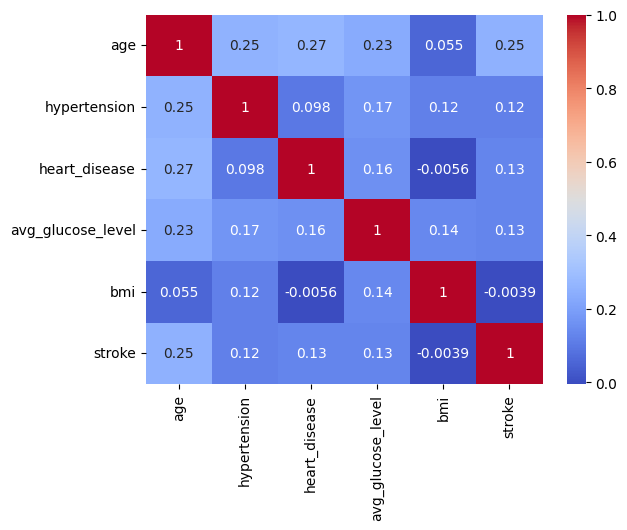

In [41]:
ax = sns.heatmap(corr, cmap = 'coolwarm', annot = True)

The graph provides a useful overview of the correlations between five different factors and stroke. The strongest correlations are between age and stroke (0.25), average glucose level and stroke (0.13), and hypertension and stroke (0.12). This suggests that older adults, people with high blood sugar, and people with hypertension are at increased risk for developing stroke.

Other correlations include heart disease and stroke (0.13) and BMI and stroke (-0.0039). This suggests that people with heart disease are also at increased risk for developing stroke, while people with a lower BMI may be at decreased risk. However, the correlation between BMI and stroke is weak, so this finding should be interpreted with caution.

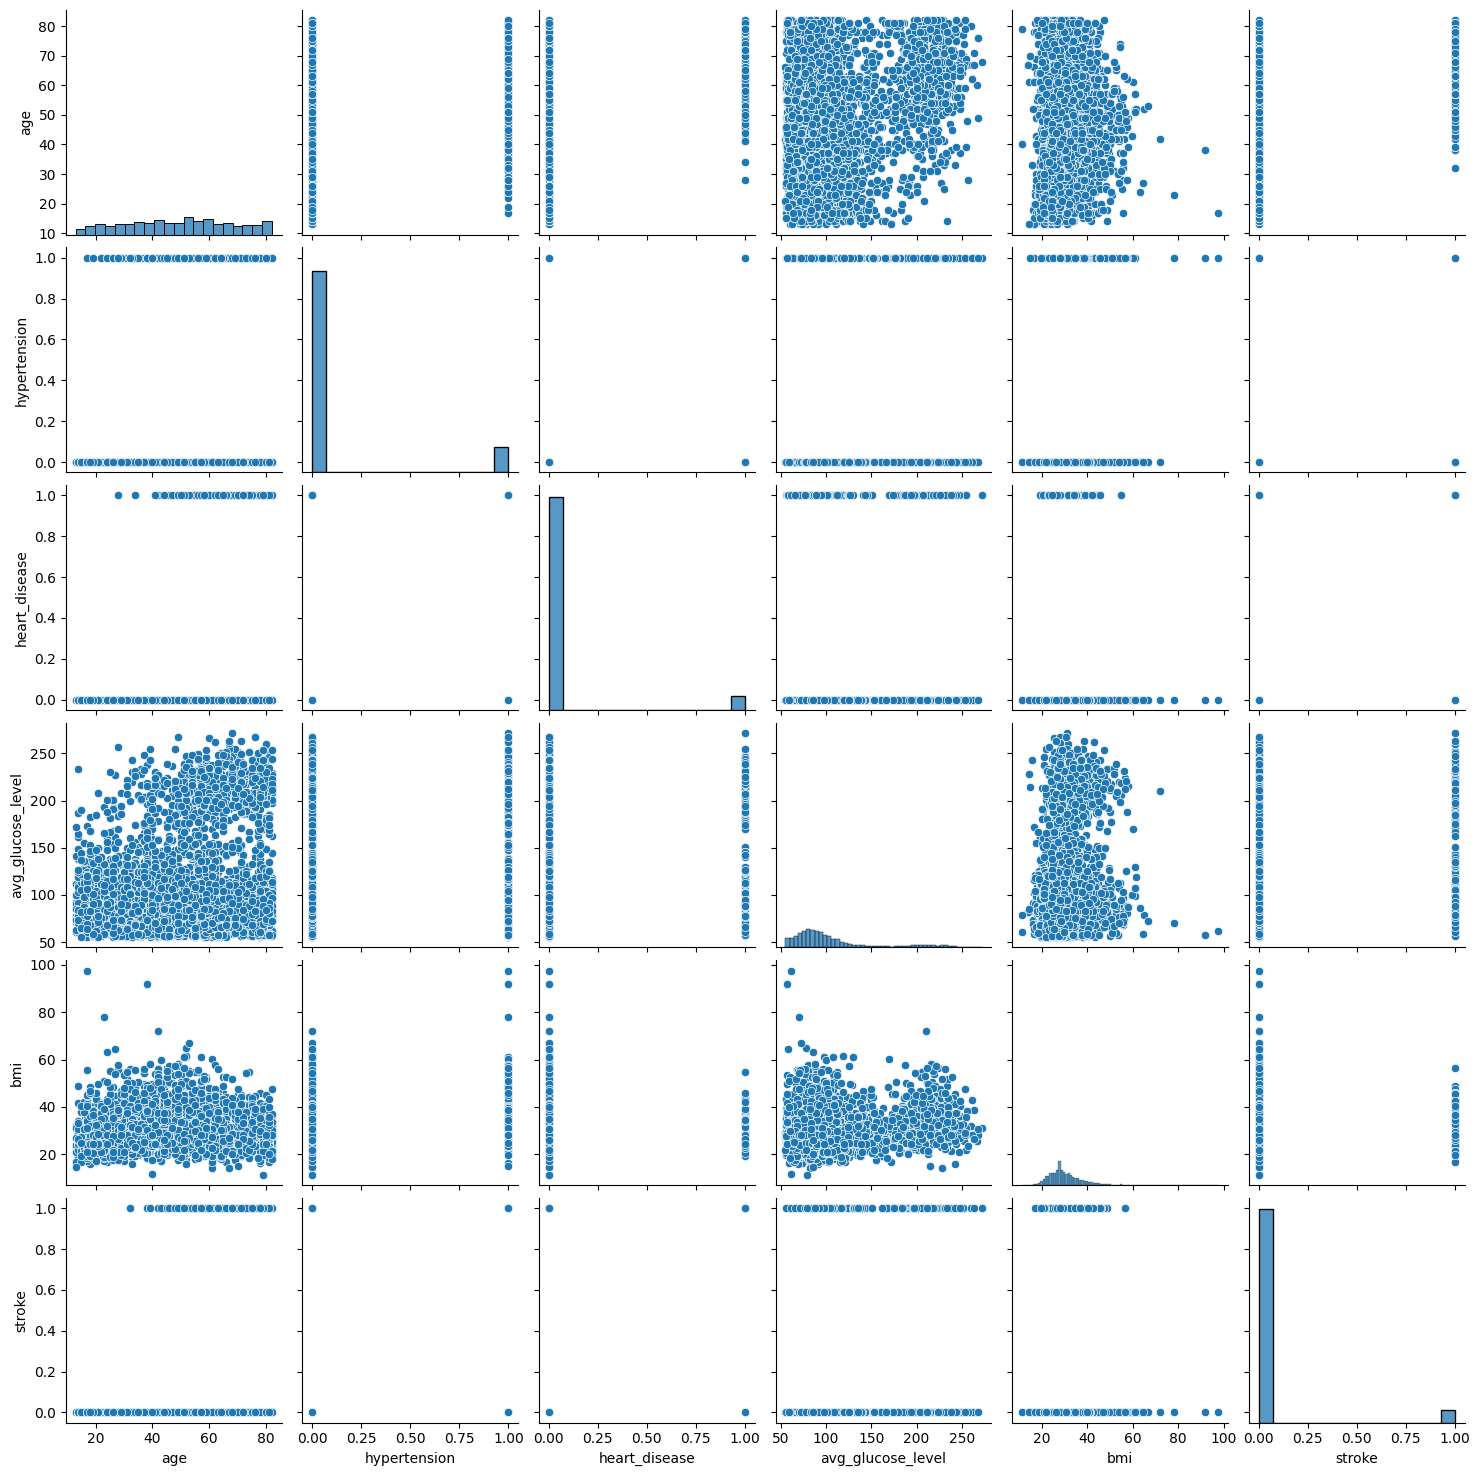

In [42]:
#Using sns pairplot to plot the relationships between all numeric variables
sns.pairplot(df);
figsize=(10,10)

#Project 2 - Part 3 (Core)

##For this part of the project, you will continue your data exploration by:
- Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.
Creating multivariate (multiple variables) exploratory visualizations to understand your data and search for trends.

- Then, choose two visualizations from your analysis that demonstrate key trends you found that will be of interest to a stakeholder. These visuals should be reporting-quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the insight associated with each visual. Both of these visualizations should be easily understood by a non-technical audience (Neither of these should be histograms, boxplots, or correlation plots).


- These plots should be so simple and so easy to read that a 6th grader could understand them in less than 10 seconds without asking questions. They don't need to be fancy; they need to CLEARLY show an interesting trend or correlation between features in your data.

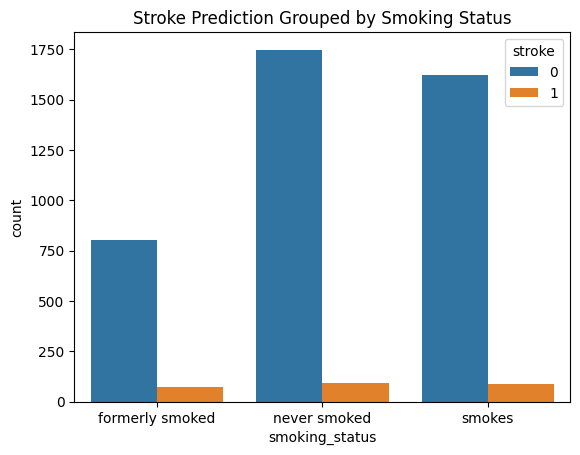

In [43]:
ax = sns.countplot(data=df, hue='stroke', x='smoking_status')
ax.set_title("Stroke Prediction Grouped by Smoking Status");

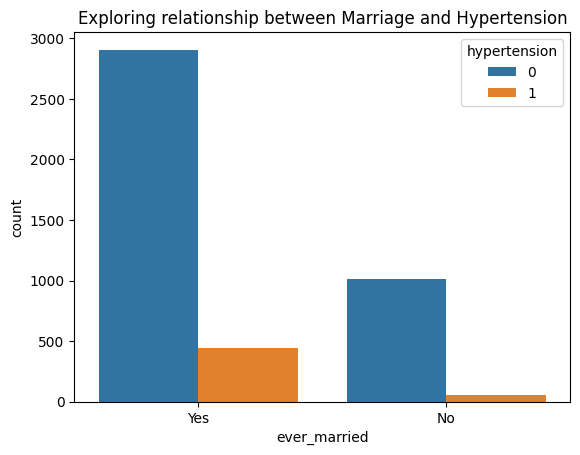

In [44]:
ax = sns.countplot(data=df, hue='hypertension', x='ever_married')
ax.set_title("Exploring relationship between Marriage and Hypertension");

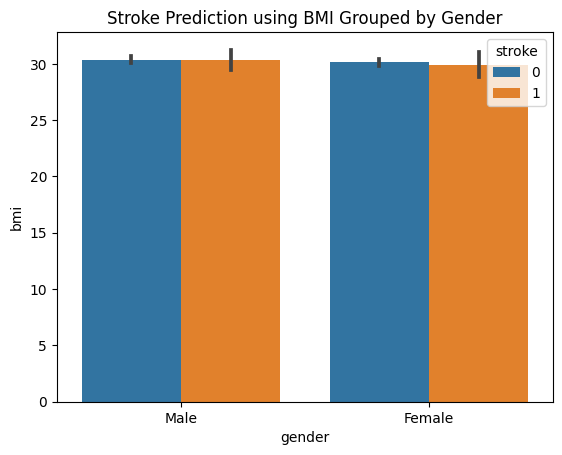

In [45]:
ax = sns.barplot(data=df, y="bmi", x="gender", hue='stroke')

ax.set_title("Stroke Prediction using BMI Grouped by Gender");

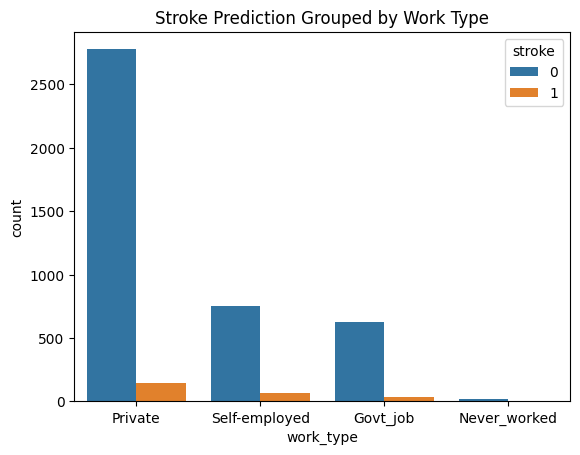

In [46]:
ax = sns.countplot(data=df, hue='stroke', x='work_type')
ax.set_title("Stroke Prediction Grouped by Work Type");

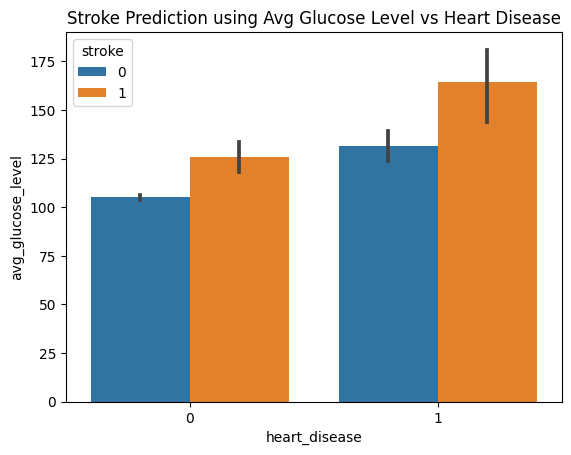

In [47]:
ax = sns.barplot(data=df, y="avg_glucose_level", x="heart_disease", hue='stroke')
ax.set_title("Stroke Prediction using Avg Glucose Level vs Heart Disease");

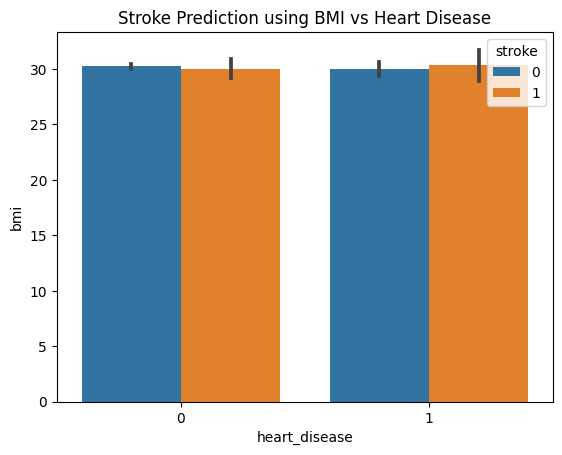

In [48]:
ax = sns.barplot(data=df, y="bmi", x="heart_disease", hue='stroke')

ax.set_title("Stroke Prediction using BMI vs Heart Disease");

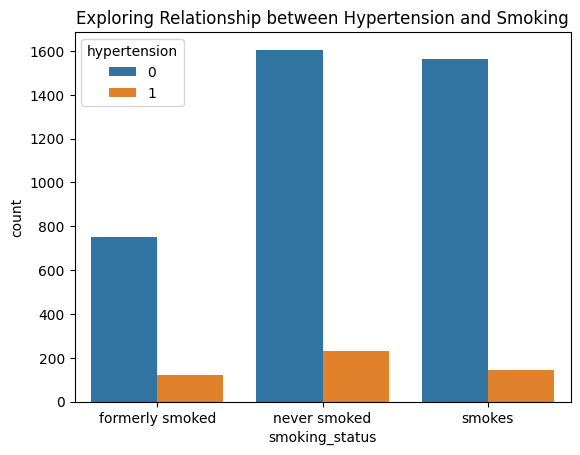

In [49]:
ax = sns.countplot(data=df, hue='hypertension', x='smoking_status')

ax.set_title("Exploring Relationship between Hypertension and Smoking");

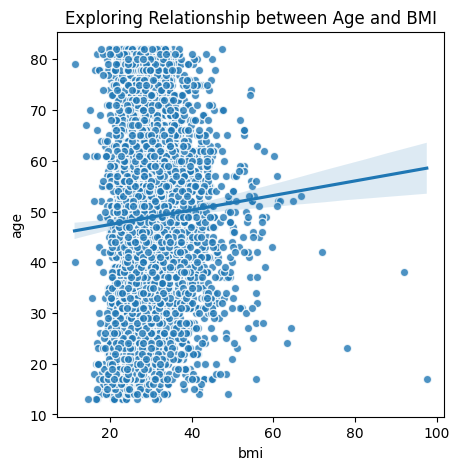

In [50]:
  fig, ax = plt.subplots(figsize=(5,5))
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x='bmi', y='age', ax=ax, scatter_kws=scatter_kws)
  ax.set_title("Exploring Relationship between Age and BMI");

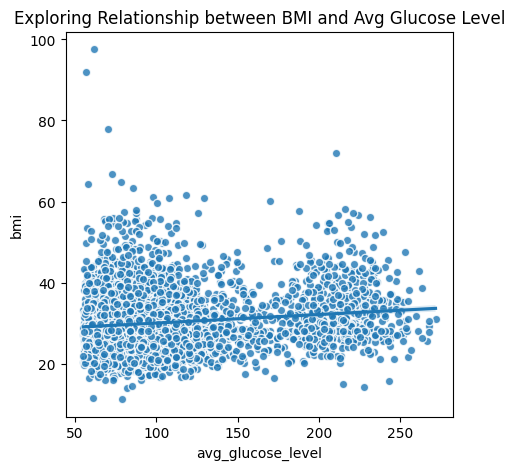

In [51]:
  fig, ax = plt.subplots(figsize=(5,5))
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x='avg_glucose_level', y='bmi', ax=ax, scatter_kws=scatter_kws)
  ax.set_title("Exploring Relationship between BMI and Avg Glucose Level");

### Choose two visualizations from your analysis that demonstrate key trends you found that will be of interest to a stakeholder. These visuals should be reporting-quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the insight associated with each visual. Both of these visualizations should be easily understood by a non-technical audience (Neither of these should be histograms, boxplots, or correlation plots).

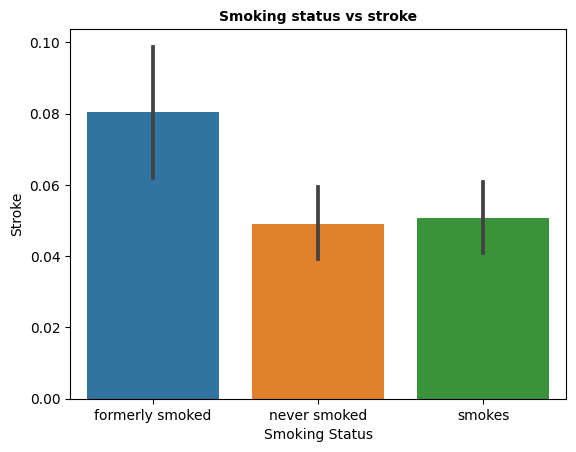

In [52]:
# Using seaborn to plot the comparison
ax = sns.barplot(data=df, x='smoking_status', y="stroke")
# Add title and labels
ax.set_ylabel('Stroke')
ax.set_xlabel("Smoking Status");
plt.title(f"Smoking status vs stroke", size=10, fontweight="black");

Interpretation

- A person that smoked before is more likely to have a stroke
- A person that did not smoke is less likely to have a stroke than a person that smokes

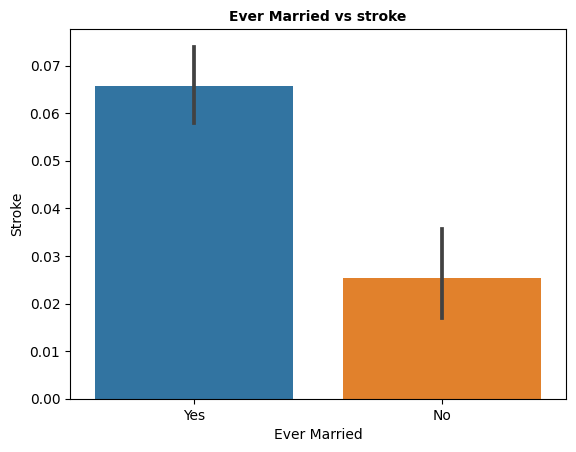

In [53]:

# Using seaborn to plot the comparison
ax = sns.barplot(data=df, x='ever_married', y="stroke")
# Add title and labels
ax.set_ylabel('Stroke')
ax.set_xlabel("Ever Married");
plt.title(f"Ever Married vs stroke", size=10, fontweight="black");

Interpretation

- Married people are more likely to suffer a stroke.

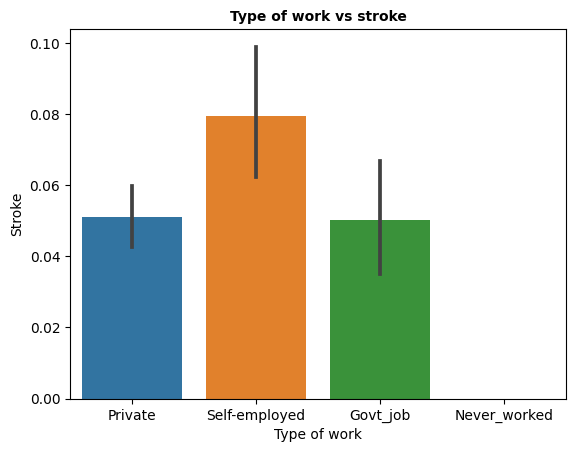

In [54]:
# Using seaborn to plot the comparison
ax = sns.barplot(data=df, x='work_type', y="stroke")
# Add title and labels
ax.set_ylabel('Stroke')
ax.set_xlabel("Type of work");
plt.title(f"Type of work vs stroke", size=10, fontweight="black");

Interpretation

- Self employed people are more likely to suffer a stroke

#**Modeling**

Ensure that you complete the appropriate pre-processing steps.
- Fit and evaluate multiple types of models on your data.
- Evaluate each model with multiple appropriate metrics on BOTH the train and test data.
- Use GridSearchCV to tune some of the hyperparameters of each model.
- Display the metrics of your best tuned version of each model type.
- Try feature engineering techniques or PCA to engineer your dataset to see how this impacts your modeling results.
- We encourage you to try multiple techniques depending on your data!

Choose your "production" model and justify this decision using the metrics most important to your business problem.
Go back through your code and ensure that you have provided clear comments (remember this is for your portfolio!).

##Preprocessing

In [55]:
df.describe().round(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4420.00,4420.00,4420.00,4420.00,4420.00,4420.00
mean,48.90,0.11,0.06,107.97,30.21,0.06
std,18.69,0.32,0.24,47.28,7.19,0.23
min,13.00,0.00,0.00,55.12,11.30,0.00
25%,34.00,0.00,0.00,77.45,25.40,0.00
50%,49.50,0.00,0.00,92.15,28.70,0.00
75%,63.00,0.00,0.00,115.87,33.70,0.00
max,82.00,1.00,1.00,271.74,97.60,1.00


In [82]:
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_sampler_pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score,\
ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer


from sklearn import set_config
set_config (transform_output='pandas')

In [56]:
df.loc[df['age'] < 18]

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
253,Male,14.0,0,0,No,Never_worked,161.28,19.1,smokes,0
284,Male,14.0,0,0,No,Govt_job,82.34,31.6,smokes,0
288,Female,17.0,0,0,No,Self-employed,82.18,23.4,smokes,0
395,Female,17.0,0,0,No,Private,87.52,39.2,never smoked,0
455,Male,13.0,0,0,No,Private,92.14,23.2,never smoked,0
...,...,...,...,...,...,...,...,...,...,...
4950,Female,17.0,0,0,No,Private,68.86,41.1,never smoked,0
4981,Male,15.0,0,0,No,Private,65.05,24.6,smokes,0
5003,Male,17.0,0,0,No,Private,63.28,40.2,smokes,0
5004,Female,17.0,0,0,No,Private,82.64,31.1,smokes,0


In [57]:
df.shape

(4420, 10)

In [58]:
#Check for missing values
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [83]:
#Define X and y and train, test, split
X = df.drop(columns = ['stroke'])
Y = df['stroke']

# Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y, random_state = 42)

In [84]:
# Creating objects for preprocessing
scaler = StandardScaler()
imputer = SimpleImputer(strategy = "mean")
numpipe = make_pipeline(imputer,scaler)
numcol = make_column_selector(dtype_include = "number")
numtuple = (numpipe,numcol)

In [85]:
ohe = OneHotEncoder(sparse_output = False, handle_unknown = "ignore")
catpipe = make_pipeline(ohe)
catcol = make_column_selector(dtype_include = "object")
cattuple = (catpipe,catcol)

In [87]:
# Creating column tansformer
preprocessor = make_column_transformer(numtuple,cattuple, remainder = "drop")
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7829e7f8f2b0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7829e7f8f490>)])

In [88]:
#Using SMOTE to balance classes
smote = SMOTE(random_state = 42)

##Decision Tree Classifier

In [89]:
# model
dtc = DecisionTreeClassifier(random_state = 42, class_weight = "balanced")
dpipe = make_sampler_pipeline(preprocessor, smote, dtc)
dpipe.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7829e7f8f2b0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7829e7f8f490>)])),
                ('smote', SMOTE(random_state=42)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=42))])

In [90]:
# base metrics
dtc_trainpred = dpipe.predict(X_train)
dtc_testpred = dpipe.predict(X_test)

print('Train Report')
print(classification_report(Y_train, dtc_trainpred))

print('Test Report')
print(classification_report(Y_test, dtc_testpred))

Train Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3130
           1       1.00      1.00      1.00       185

    accuracy                           1.00      3315
   macro avg       1.00      1.00      1.00      3315
weighted avg       1.00      1.00      1.00      3315

Test Report
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1043
           1       0.12      0.26      0.17        62

    accuracy                           0.85      1105
   macro avg       0.54      0.57      0.54      1105
weighted avg       0.91      0.85      0.88      1105



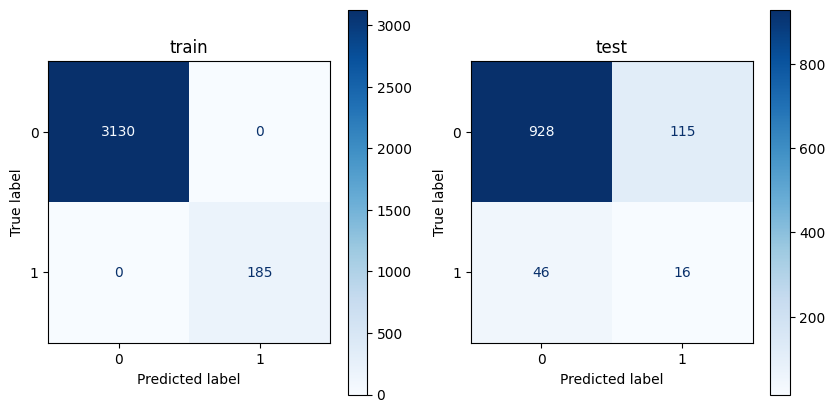

In [91]:
# confusion matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
ConfusionMatrixDisplay.from_predictions(Y_train, dtc_trainpred, ax = axes[0], cmap = "Blues");
axes[0].set_title("train")

ConfusionMatrixDisplay.from_predictions(Y_test, dtc_testpred, ax = axes[1], cmap = "Blues");
axes[1].set_title("test");

In [92]:
# tuning
dpipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7829e7f8f2b0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7829e7f8f490>)])),
  ('smote', SMOTE(random_state=42)),
  ('decisiontreeclassifier

In [93]:
param_grid = {
    'decisiontreeclassifier__max_depth': [1,5,10,15,20],
    'decisiontreeclassifier__max_features': [None,1,4,6,10],
    }

In [94]:
# gridsearch
grid_search = GridSearchCV(dpipe, param_grid, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


{'decisiontreeclassifier__max_depth': 20,
 'decisiontreeclassifier__max_features': 1}

In [96]:
best_model = grid_search.best_estimator_

In [99]:
# tuned metrics

trainpredtuned = best_model.predict(X_train)
testpredtuned = best_model.predict(X_test)

print('Train\n', classification_report(Y_train, trainpredtuned))
print('Test\n', classification_report(Y_test, testpredtuned))

Train
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      3130
           1       0.91      0.98      0.95       185

    accuracy                           0.99      3315
   macro avg       0.95      0.99      0.97      3315
weighted avg       0.99      0.99      0.99      3315

Test
               precision    recall  f1-score   support

           0       0.96      0.90      0.92      1043
           1       0.15      0.31      0.20        62

    accuracy                           0.86      1105
   macro avg       0.55      0.60      0.56      1105
weighted avg       0.91      0.86      0.88      1105



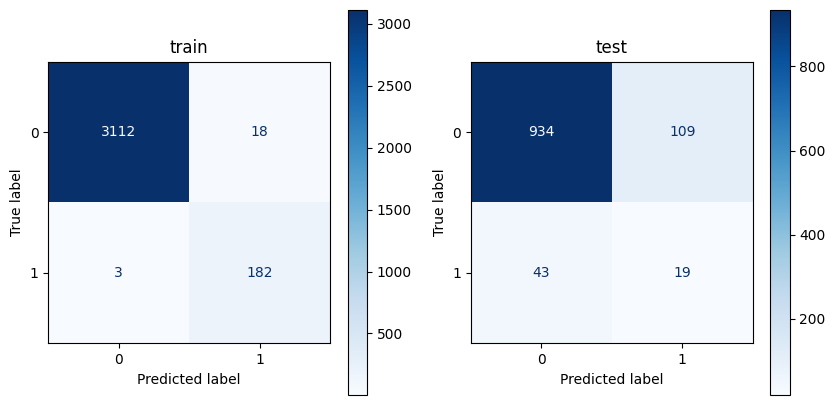

In [98]:
# confusion matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
ConfusionMatrixDisplay.from_predictions(Y_train, trainpredtuned, ax = axes[0], cmap = "Blues");
axes[0].set_title("train")

ConfusionMatrixDisplay.from_predictions(Y_test, testpredtuned, ax = axes[1], cmap = "Blues");
axes[1].set_title("test");

##K-nearest neighbours classifier

In [100]:
# model
knn = KNeighborsClassifier()
kpipe = make_sampler_pipeline(preprocessor, smote, knn)
kpipe.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7829e7f8f2b0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7829e7f8f490>)])),
                ('smote', SMOTE(random_state=42)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [101]:
# base metrics
knn_trainpred = kpipe.predict(X_train)
knn_testpred = kpipe.predict(X_test)

print('Train Report')
print(classification_report(Y_train, knn_trainpred))

print('Test Report')
print(classification_report(Y_test, knn_testpred))

Train Report
              precision    recall  f1-score   support

           0       1.00      0.86      0.93      3130
           1       0.30      1.00      0.46       185

    accuracy                           0.87      3315
   macro avg       0.65      0.93      0.70      3315
weighted avg       0.96      0.87      0.90      3315

Test Report
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1043
           1       0.10      0.32      0.15        62

    accuracy                           0.79      1105
   macro avg       0.52      0.57      0.52      1105
weighted avg       0.91      0.79      0.84      1105



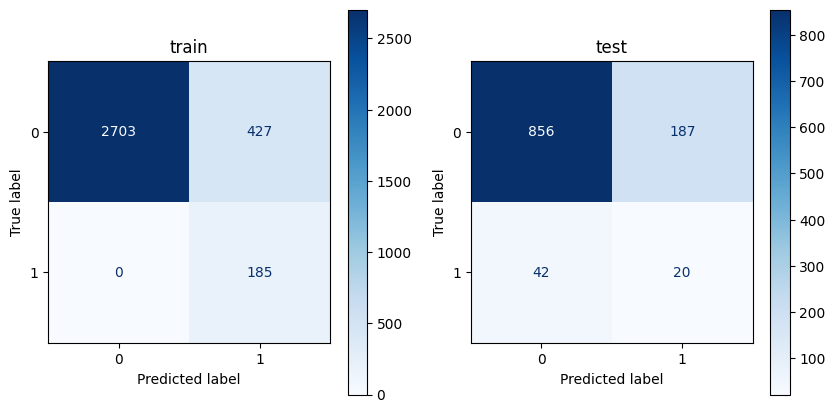

In [102]:
# confusion matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
ConfusionMatrixDisplay.from_predictions(Y_train, knn_trainpred, ax = axes[0], cmap = "Blues");
axes[0].set_title("train")

ConfusionMatrixDisplay.from_predictions(Y_test, knn_testpred, ax = axes[1], cmap = "Blues");
axes[1].set_title("test");

In [103]:
# tuning
kpipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7829e7f8f2b0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7829e7f8f490>)])),
  ('smote', SMOTE(random_state=42)),
  ('kneighborsclassifier',

In [104]:
param_grid = {
    'kneighborsclassifier__n_neighbors': [5,6,7,9,12],

    }

In [105]:
# gridsearch
grid_search = GridSearchCV(kpipe, param_grid, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'kneighborsclassifier__n_neighbors': 6}

In [107]:
best_model = grid_search.best_estimator_

In [108]:
# tuned metrics

trainpredtuned = best_model.predict(X_train)
testpredtuned = best_model.predict(X_test)

print('Train\n', classification_report(Y_train, trainpredtuned))
print('Test\n', classification_report(Y_test, testpredtuned))

Train
               precision    recall  f1-score   support

           0       1.00      0.88      0.93      3130
           1       0.32      1.00      0.49       185

    accuracy                           0.88      3315
   macro avg       0.66      0.94      0.71      3315
weighted avg       0.96      0.88      0.91      3315

Test
               precision    recall  f1-score   support

           0       0.95      0.83      0.89      1043
           1       0.10      0.32      0.16        62

    accuracy                           0.80      1105
   macro avg       0.53      0.58      0.52      1105
weighted avg       0.91      0.80      0.85      1105



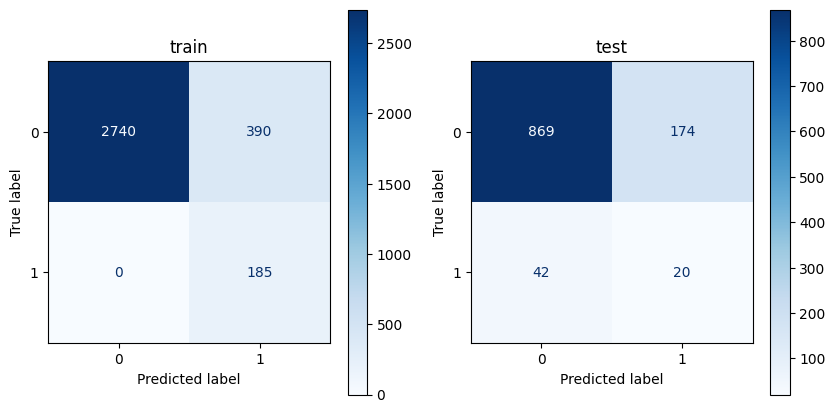

In [109]:
# confusion matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
ConfusionMatrixDisplay.from_predictions(Y_train, trainpredtuned, ax = axes[0], cmap = "Blues");
axes[0].set_title("train")

ConfusionMatrixDisplay.from_predictions(Y_test, testpredtuned, ax = axes[1], cmap = "Blues");
axes[1].set_title("test");

##Logistic regression

In [110]:
# model
lr = LogisticRegression(random_state = 42, class_weight = "balanced")
lrpipe = make_sampler_pipeline(preprocessor,smote, lr)
lrpipe.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7829e7f8f2b0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7829e7f8f490>)])),
                ('smote', SMOTE(random_state=42)),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [111]:
# base metrics
trainpred = lrpipe.predict(X_train)
testpred =  lrpipe.predict(X_test)

print('Train\n', classification_report(Y_train, trainpred))
print('Test\n', classification_report(Y_test, testpred))

Train
               precision    recall  f1-score   support

           0       0.98      0.73      0.84      3130
           1       0.14      0.76      0.24       185

    accuracy                           0.73      3315
   macro avg       0.56      0.75      0.54      3315
weighted avg       0.93      0.73      0.80      3315

Test
               precision    recall  f1-score   support

           0       0.98      0.74      0.84      1043
           1       0.15      0.76      0.24        62

    accuracy                           0.74      1105
   macro avg       0.56      0.75      0.54      1105
weighted avg       0.93      0.74      0.81      1105



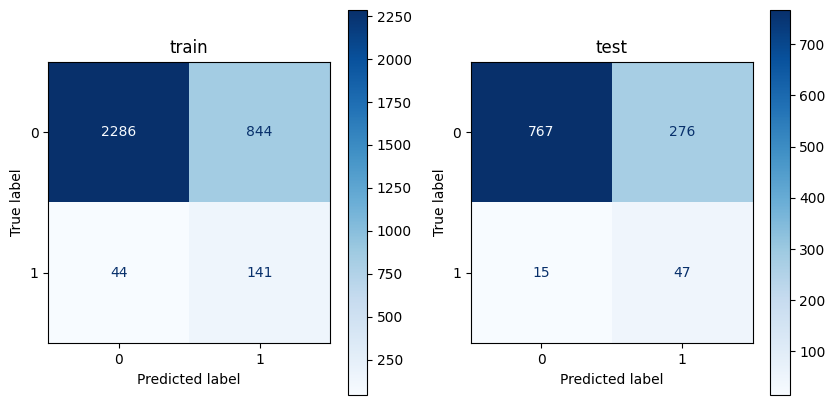

In [112]:
# confusion matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
ConfusionMatrixDisplay.from_predictions(Y_train, trainpred, ax = axes[0], cmap = "Blues");
axes[0].set_title("train")

ConfusionMatrixDisplay.from_predictions(Y_test, testpred, ax = axes[1], cmap = "Blues");
axes[1].set_title("test");

In [113]:
# tuning
lrpipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7829e7f8f2b0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7829e7f8f490>)])),
  ('smote', SMOTE(random_state=42)),
  ('logisticregression',
 

In [115]:
param_grid = {
    'logisticregression__C': [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000],

    }

In [116]:
# gridsearch
grid_search = GridSearchCV(lrpipe, param_grid, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'logisticregression__C': 0.0001}

In [117]:
# tuned metrics
trainpredtuned = best_model.predict(X_train)
testpredtuned = best_model.predict(X_test)

print('Train\n', classification_report(Y_train, trainpredtuned))
print('Test\n', classification_report(Y_test, testpredtuned))

Train
               precision    recall  f1-score   support

           0       1.00      0.88      0.93      3130
           1       0.32      1.00      0.49       185

    accuracy                           0.88      3315
   macro avg       0.66      0.94      0.71      3315
weighted avg       0.96      0.88      0.91      3315

Test
               precision    recall  f1-score   support

           0       0.95      0.83      0.89      1043
           1       0.10      0.32      0.16        62

    accuracy                           0.80      1105
   macro avg       0.53      0.58      0.52      1105
weighted avg       0.91      0.80      0.85      1105



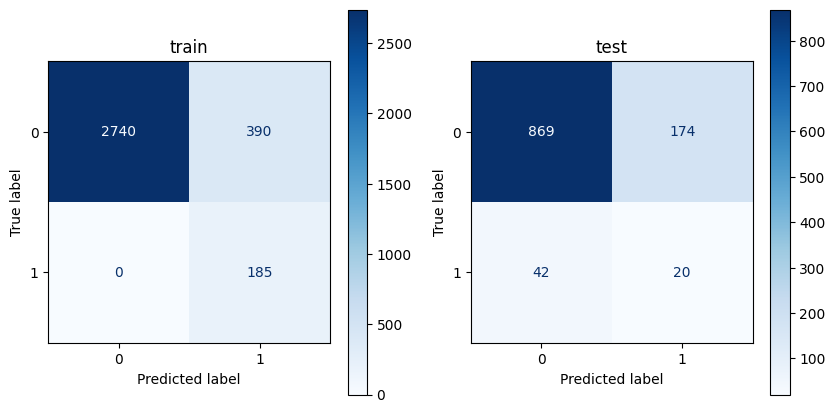

In [118]:
# confusion matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
ConfusionMatrixDisplay.from_predictions(Y_train, trainpredtuned, ax = axes[0], cmap = "Blues");
axes[0].set_title("train")

ConfusionMatrixDisplay.from_predictions(Y_test, testpredtuned, ax = axes[1], cmap = "Blues");
axes[1].set_title("test");

##PCA for decisiontree classifier

In [119]:
# PCA with 85% explained variance
PCA85 = PCA(n_components=.85)

In [120]:
transformer = make_sampler_pipeline(preprocessor,PCA85)
d = DecisionTreeClassifier(random_state = 42)
dpcapipe = make_pipeline(transformer,d)
dpcapipe.fit(X_train,Y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer()),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7829e7f8f2b0>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse_output=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7829e7f8f490>)])),
                                 ('pca', PCA(n_components=0.85))])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [121]:
trainpredtuned = dpcapipe.predict(X_train)
testpredtuned = dpcapipe.predict(X_test)

print('Train\n', classification_report(Y_train, trainpredtuned))
print('Test\n', classification_report(Y_test, testpredtuned))

Train
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3130
           1       1.00      1.00      1.00       185

    accuracy                           1.00      3315
   macro avg       1.00      1.00      1.00      3315
weighted avg       1.00      1.00      1.00      3315

Test
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      1043
           1       0.08      0.08      0.08        62

    accuracy                           0.89      1105
   macro avg       0.51      0.51      0.51      1105
weighted avg       0.90      0.89      0.90      1105



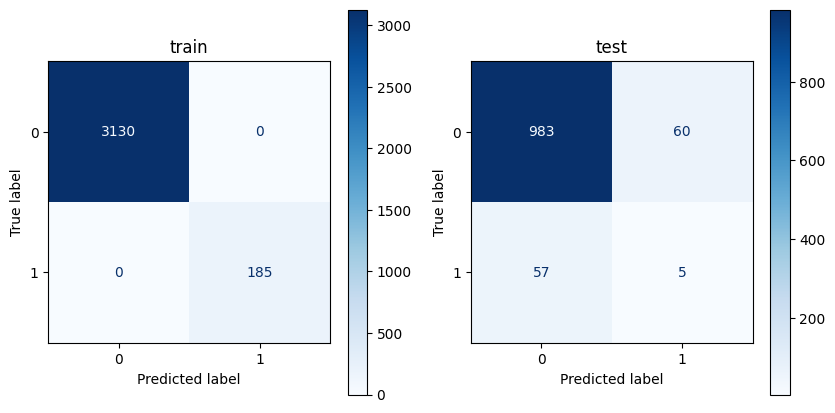

In [122]:
# confusion matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
ConfusionMatrixDisplay.from_predictions(Y_train, trainpredtuned, ax = axes[0], cmap = "Blues");
axes[0].set_title("train")

ConfusionMatrixDisplay.from_predictions(Y_test, testpredtuned, ax = axes[1], cmap = "Blues");
axes[1].set_title("test");

##Choose your "production" model and justify this decision using the metrics most important to your business problem.

This is a classification task with stroke as the target feature. Our main aim in making predictions with any of these models is to minimize/reduce false negatives, as an incorrect negative stroke prediction could prove life threatening to the particular patient.

In the above instances, the KNN model with PCA applied provided the highest overall accuracy score for the test data, as well as the highest precision score of all the models used. The instances where the precision and recall scores were 0, indicates that there were no true positives and therefore our model was not a good one. This could also be due to the highly imbalanced dataset we are working with.

Since we are trying to minimize false negatives, we should aim to tune our model to improve the recall score, and this may also improve our overall accuracy score.